In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [27]:
fb=pd.read_csv(r'C:\Users\shwet\Desktop\New folder (2)\FB.csv')
fb.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-31,54.119999,54.860001,53.910000,54.650002,54.650002,43076200
1,2014-01-02,54.830002,55.220001,54.189999,54.709999,54.709999,43195500
2,2014-01-03,55.020000,55.650002,54.529999,54.560001,54.560001,38246200
3,2014-01-06,54.419998,57.259998,54.049999,57.200001,57.200001,68852600
4,2014-01-07,57.700001,58.549999,57.220001,57.919998,57.919998,77207400


In [6]:
#fb.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [90]:
#fb.info

<bound method DataFrame.info of             Date        Open        High         Low       Close   Adj Close  \
0     2013-12-31   54.119999   54.860001   53.910000   54.650002   54.650002   
1     2014-01-02   54.830002   55.220001   54.189999   54.709999   54.709999   
2     2014-01-03   55.020000   55.650002   54.529999   54.560001   54.560001   
3     2014-01-06   54.419998   57.259998   54.049999   57.200001   57.200001   
4     2014-01-07   57.700001   58.549999   57.220001   57.919998   57.919998   
...          ...         ...         ...         ...         ...         ...   
1254  2018-12-24  123.099998  129.740005  123.019997  124.059998  124.059998   
1255  2018-12-26  126.000000  134.240005  125.889999  134.179993  134.179993   
1256  2018-12-27  132.440002  134.990005  129.669998  134.520004  134.520004   
1257  2018-12-28  135.339996  135.919998  132.199997  133.199997  133.199997   
1258  2018-12-31  134.449997  134.639999  129.949997  131.089996  131.089996   

       

In [91]:
#fb.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [92]:
#fb.index

RangeIndex(start=0, stop=1259, step=1)

In [49]:
fb = fb.replace(',', '', regex=True)

In [50]:

fb['Open'] = fb['Open'].astype(int)
fb['High'] = fb['High'].astype(int)
fb['Low'] = fb['Low'].astype(int)
fb['Close'] = fb['Close'].astype(int)
fb['Adj Close'] = fb['Adj Close'].astype(int)

In [51]:
fb.dtypes

Date          object
Open           int32
High           int32
Low            int32
Close          int32
Adj Close      int32
Volume         int64
Profit       float64
dtype: object

In [52]:
import pandas as pd
import networkx as nx

# Read the dataset
df = fb

# Data Preprocessing: Check for and remove rows with identical "Open" and "Close" values
df_cleaned = df[df['Open'] != df['Close']]

# Create the graph
G = nx.from_pandas_edgelist(df_cleaned, 'Open', 'Close')

# Visualization or further analysis with the cleaned graph


In [53]:
fb

,Date,Open,High,Low,Close,Adj Close,Volume,Profit
0,2013-12-31,54,54,53,54,54,43076200,0.530003
1,2014-01-02,54,55,54,54,54,43195500,-0.120003
2,2014-01-03,55,55,54,54,54,38246200,-0.459999
3,2014-01-06,54,57,54,57,57,68852600,2.780003
4,2014-01-07,57,58,57,57,57,77207400,0.219997
...,...,...,...,...,...,...,...,...
1254,2018-12-24,123,129,123,124,124,22066000,0.960000
1255,2018-12-26,126,134,125,134,134,39723400,8.179993
1256,2018-12-27,132,134,129,134,134,31202500,2.080002
1257,2018-12-28,135,135,132,133,133,22627600,-2.139999


# EDA

Relationship between 'Open' and 'Close' prices for Facebook's stock

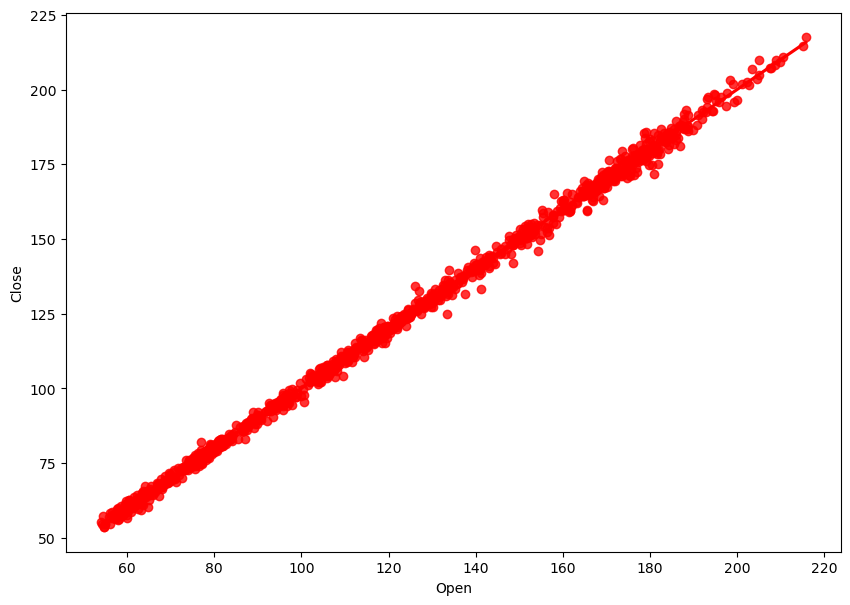

In [30]:
plt.figure(figsize=(10,7))
sns.regplot(x=fb['Open'],y=fb['Close'], color='r')
plt.show()

In [31]:
#Create a new column 'Profit' to store the profit when the stock opens

fb['Profit'] = fb['Close'] - fb['Open']
fb


,Date,Open,High,Low,Close,Adj Close,Volume,Profit
0,2013-12-31,54.119999,54.860001,53.910000,54.650002,54.650002,43076200,0.530003
1,2014-01-02,54.830002,55.220001,54.189999,54.709999,54.709999,43195500,-0.120003
2,2014-01-03,55.020000,55.650002,54.529999,54.560001,54.560001,38246200,-0.459999
3,2014-01-06,54.419998,57.259998,54.049999,57.200001,57.200001,68852600,2.780003
4,2014-01-07,57.700001,58.549999,57.220001,57.919998,57.919998,77207400,0.219997
...,...,...,...,...,...,...,...,...
1254,2018-12-24,123.099998,129.740005,123.019997,124.059998,124.059998,22066000,0.960000
1255,2018-12-26,126.000000,134.240005,125.889999,134.179993,134.179993,39723400,8.179993
1256,2018-12-27,132.440002,134.990005,129.669998,134.520004,134.520004,31202500,2.080002
1257,2018-12-28,135.339996,135.919998,132.199997,133.199997,133.199997,22627600,-2.139999


In [98]:
fb.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Profit'],
      dtype='object')

c:\Users\shwet\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\shwet\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\shwet\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\shwet\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Figure size 1000x700 with 0 Axes>

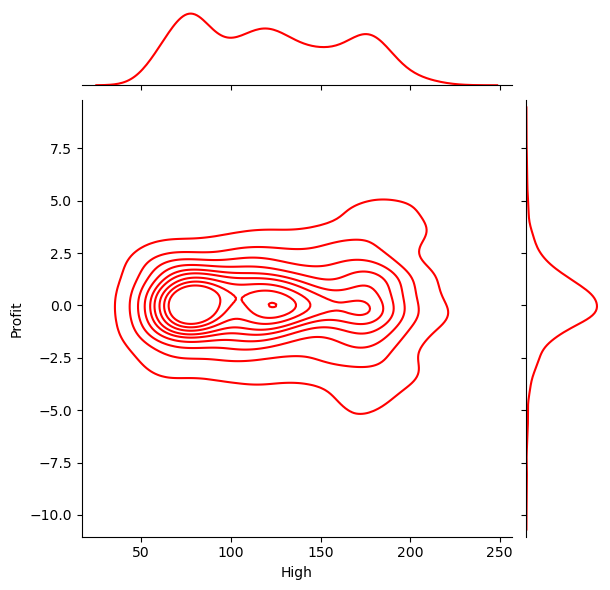

In [32]:
#Relationship between the 'High' prices and the 'Profit' values

plt.figure(figsize=(10,7))
sns.jointplot(x=fb['High'], y=fb['Profit'], kind='kde', color='r')

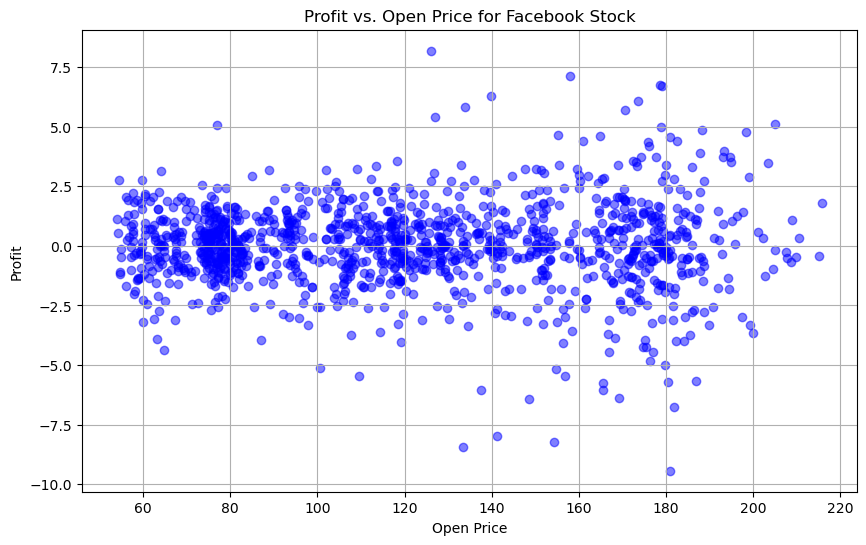

In [33]:
#plot the relationship between the profit and the opening price of Facebook's stock

plt.figure(figsize=(10, 6))
plt.scatter(fb['Open'], fb['Profit'], color='b', alpha=0.5)
plt.xlabel('Open Price')
plt.ylabel('Profit')
plt.title('Profit vs. Open Price for Facebook Stock')
plt.grid(True)
plt.show()

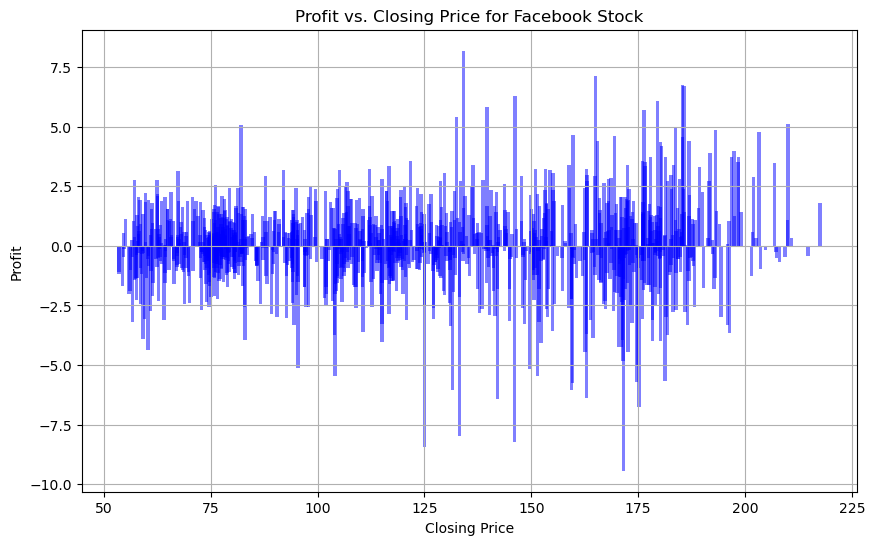

In [37]:
#plot the relationship between the profit and the closing price of Facebook's stock

plt.figure(figsize=(10, 6))
plt.bar(fb['Close'], fb['Profit'], color='b', alpha=0.5)
plt.xlabel('Closing Price')
plt.ylabel('Profit')
plt.title('Profit vs. Closing Price for Facebook Stock')
plt.grid(True)
plt.show()

In [38]:
fb.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Profit
0,2013-12-31,54.119999,54.860001,53.910000,54.650002,54.650002,43076200,0.530003
1,2014-01-02,54.830002,55.220001,54.189999,54.709999,54.709999,43195500,-0.120003
2,2014-01-03,55.020000,55.650002,54.529999,54.560001,54.560001,38246200,-0.459999
3,2014-01-06,54.419998,57.259998,54.049999,57.200001,57.200001,68852600,2.780003
4,2014-01-07,57.700001,58.549999,57.220001,57.919998,57.919998,77207400,0.219997


In [41]:
# ml model 
# let's assume you want to predict the "Profit" based on other features such as Open, High, Low, Close, Adj Close, and Volume.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *

# Load the sample data into a DataFrame
data= fb

df = pd.DataFrame(data)

# Split the data into features (X) and target variable (y)
X = df.drop(['Date', 'Profit'], axis=1)
y = df['Profit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)




Mean Squared Error: 1.9518561338551152


In [43]:
#svm

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Load the sample data into a DataFrame
data = fb

df = pd.DataFrame(data)

# Split the data into features (X) and target variable (y)
X = df.drop(['Date', 'Profit'], axis=1)
y = df['Profit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Support Vector Regressor model
model = SVR()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 2.83733447324208


In [105]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


# Load the sample data into a DataFrame
data = fb

df = pd.DataFrame(data)

# Split the data into features (X) and target variable (y)
X = df.drop(['Date', 'Profit'], axis=1)
y = df['Profit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 6.448323471393591e-25


In [106]:
import numpy as np
import tensorflow as tf

# Sample data
data =fb
# Convert data to numpy array
features = np.array([data[col] for col in ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]).T
labels = np.array(data['Profit'])

# Normalize features
features = (features - np.mean(features, axis=0)) / np.std(features, axis=0)

# Compute cosine similarity between data points
adjacency_matrix = np.dot(features, features.T)

# Define GCN model
class GCN(tf.keras.Model):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.dense1 = tf.keras.layers.Dense(hidden_dim, activation='relu')
        self.dense2 = tf.keras.layers.Dense(output_dim)

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return x

# Instantiate the GCN model
input_dim = features.shape[1]
hidden_dim = 16
output_dim = 1  # Regression task for 'Profit'
model = GCN(input_dim, hidden_dim, output_dim)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(features, labels, epochs=50, batch_size=1, verbose=1)

# Evaluate the model
loss = model.evaluate(features, labels, verbose=0)
print("Mean Squared Error:", loss)


Epoch 1/50
1259/1259 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 3.2563
Epoch 2/50
1259/1259 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 3.1315
Epoch 3/50
1259/1259 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 3.2034
Epoch 4/50
1259/1259 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 3.4024
Epoch 5/50
1259/1259 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 3.6674
Epoch 6/50
1259/1259 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.1424
Epoch 7/50
1259/1259 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.6111
Epoch 8/50
1259/1259 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 3.2419
Epoch 9/50
1259/1259 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 3.2094
Epoch 10/50
1259/1259 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 3.2370
Epoch 11/50
1259/1259 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.9342
Epoch 12/50
1259/1259 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.8407
Epoch 13/50
1259/1259 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 3.0252
Epoch 14/50
1259/1259 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.1422
Epoch 15/50
1259/1259 ━━━━━━━

In [107]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Load the dataset
data = fb # Replace 'your_dataset.csv' with the path to your dataset

# Drop any rows with missing values
data.dropna(inplace=True)

# Define features and target variable
numeric_features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
target = 'Profit'

# Separate features and target variable
X = data[numeric_features]
y = data[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network architecture
input_layer = Input(shape=(X_train_scaled.shape[1],))
hidden_layer_1 = Dense(64, activation='relu')(input_layer)
hidden_layer_2 = Dense(32, activation='relu')(hidden_layer_1)
output_layer = Dense(1)(hidden_layer_2)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
mse = model.evaluate(X_test_scaled, y_test)
print("Mean Squared Error on Test Set:", mse)

# Predictions
y_pred = model.predict(X_test_scaled)


Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 3.3464 - val_loss: 3.2158
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.9036 - val_loss: 3.2048
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.0716 - val_loss: 3.1961
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.1084 - val_loss: 3.1959
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2937 - val_loss: 3.1898
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.5058 - val_loss: 3.1887
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3274 - val_loss: 3.1837
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.9437 - val_loss: 3.1664
Epoch 9/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.2376 - val_loss: 3.1390
Epoch 10/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.0488 - val_loss: 3.1278
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9662 
Mean Squared Error on Test Set: 2.799644947052002
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [108]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Squared Error: 2.7996
R-squared: 0.0416


In [44]:
import pandas as pd
import networkx as nx

# Load the dataset
data = fb # Replace 'your_dataset.csv' with the path to your dataset

# Create a graph from the dataset
G = nx.from_pandas_edgelist(data, source='Open', target='Close')

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Print degree centrality for each node
for node, centrality in degree_centrality.items():
    print(f"Node {node}: Degree Centrality = {centrality}")


Node 54.119999: Degree Centrality = 0.0004452359750667854
Node 54.650002: Degree Centrality = 0.0004452359750667854
Node 54.830002: Degree Centrality = 0.0004452359750667854
Node 54.709999: Degree Centrality = 0.0004452359750667854
Node 55.02: Degree Centrality = 0.0004452359750667854
Node 54.560001: Degree Centrality = 0.0004452359750667854
Node 54.419998: Degree Centrality = 0.0004452359750667854
Node 57.200001: Degree Centrality = 0.0004452359750667854
Node 57.700001: Degree Centrality = 0.0004452359750667854
Node 57.919998: Degree Centrality = 0.0008904719501335708
Node 57.599998: Degree Centrality = 0.0013357079252003562
Node 58.23: Degree Centrality = 0.0004452359750667854
Node 58.650002: Degree Centrality = 0.0004452359750667854
Node 57.220001: Degree Centrality = 0.0004452359750667854
Node 57.130001: Degree Centrality = 0.0004452359750667854
Node 57.939999: Degree Centrality = 0.0004452359750667854
Node 57.91: Degree Centrality = 0.0004452359750667854
Node 55.91: Degree Central

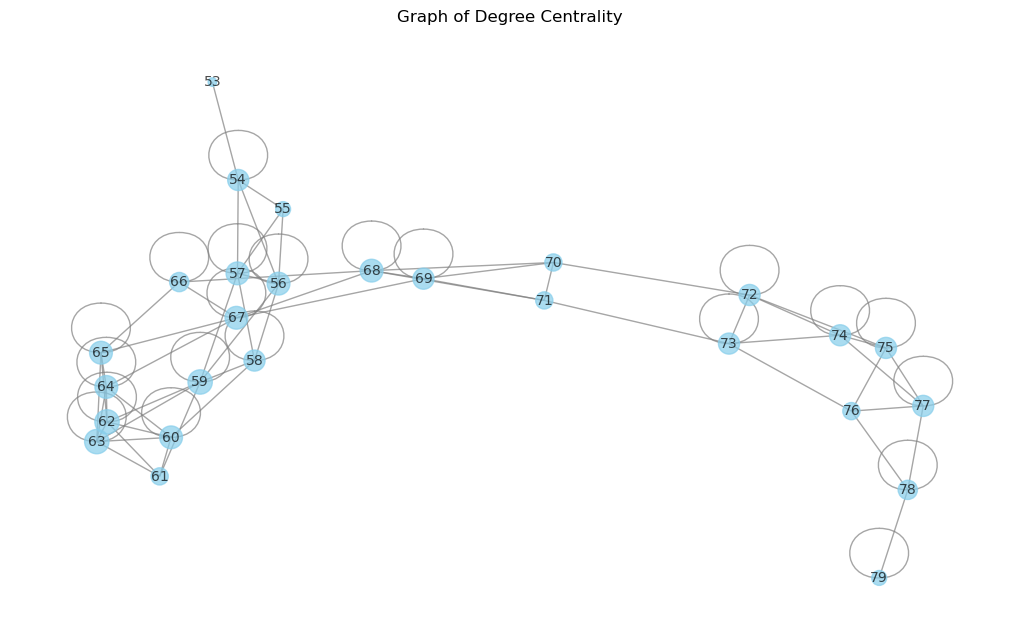

In [54]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the dataset
data = df  # Replace 'your_dataset.csv' with the path to your dataset
data=data.head(200)
# Create a graph from the dataset
G = nx.from_pandas_edgelist(data, source='Open', target='Close')

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Plot degree centrality
plt.figure(figsize=(10, 6))
nx.draw(G, 
        pos=nx.spring_layout(G),  # Position nodes using spring layout
        node_color='skyblue', 
        node_size=[v * 1000 for v in degree_centrality.values()],  # Node size proportional to degree centrality
        with_labels=True, 
        font_size=10,
        edge_color='gray',
        alpha=0.7)
plt.title('Graph of Degree Centrality')
plt.show()


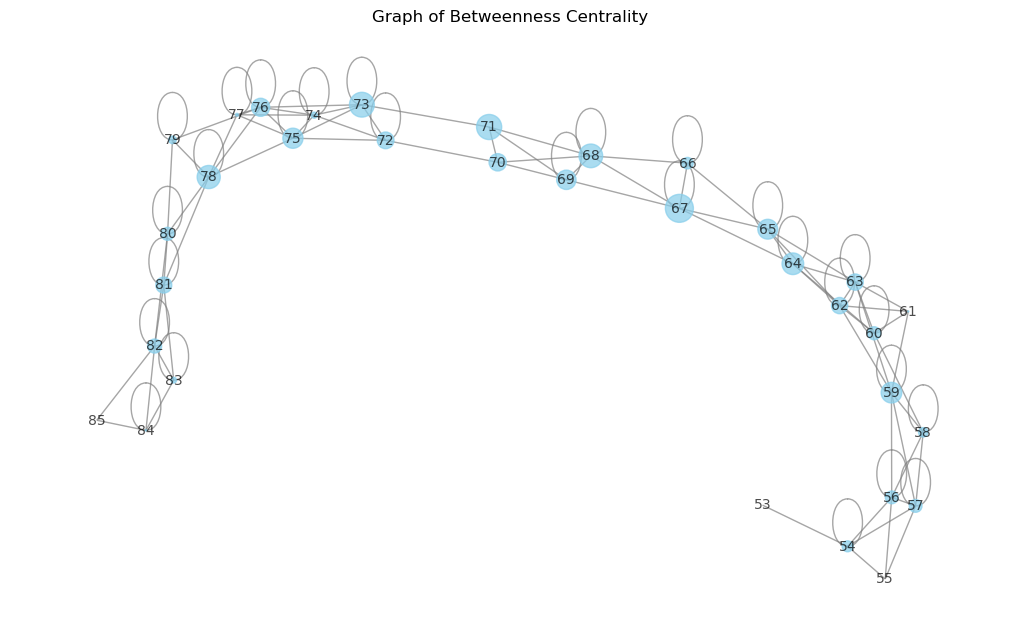

In [12]:
# Load the dataset
data = fb  # Replace 'your_dataset.csv' with the path to your dataset
data=data.head(350)
# Create a graph from the dataset
G = nx.from_pandas_edgelist(data, source='Open', target='Close')

# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Plot betweenness centrality
plt.figure(figsize=(10, 6))
nx.draw(G, 
        pos=nx.spring_layout(G),  # Position nodes using spring layout
        node_color='skyblue', 
        node_size=[v * 1000 for v in betweenness_centrality.values()],  # Node size proportional to betweenness centrality
        with_labels=True, 
        font_size=10,
        edge_color='gray',
        alpha=0.7)
plt.title('Graph of Betweenness Centrality')
plt.show()


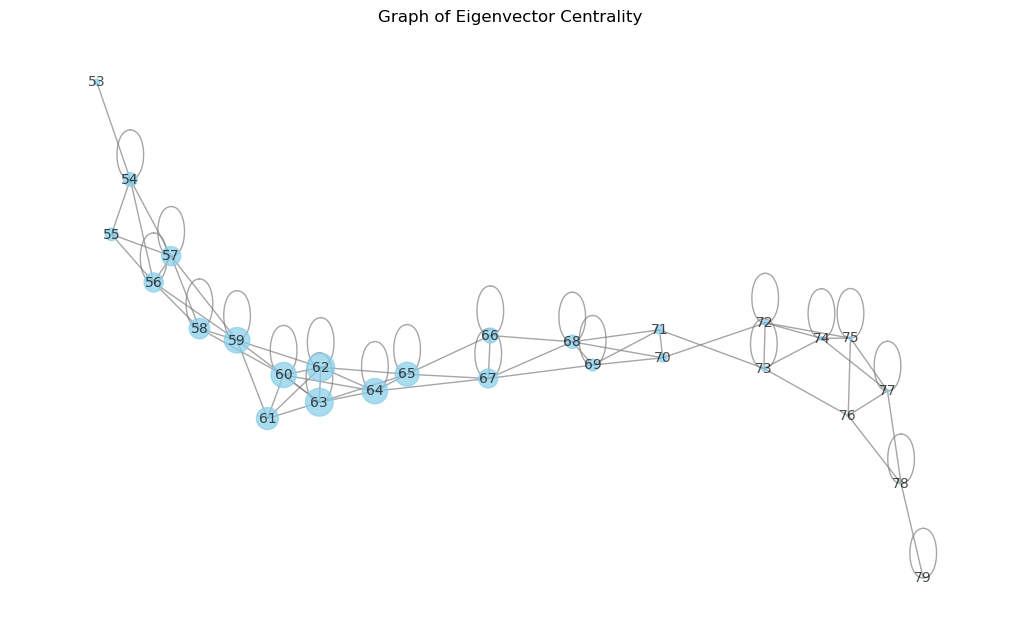

In [16]:
# Load the dataset
data = fb  # Replace 'your_dataset.csv' with the path to your dataset
data=data.head(200)
# Create a graph from the dataset
G = nx.from_pandas_edgelist(data, source='Open', target='Close')

# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# Plot eigenvector centrality
plt.figure(figsize=(10, 6))
nx.draw(G, 
        pos=nx.spring_layout(G),  # Position nodes using spring layout
        node_color='skyblue', 
        node_size=[v * 1000 for v in eigenvector_centrality.values()],  # Node size proportional to eigenvector centrality
        with_labels=True, 
        font_size=10,
        edge_color='gray',
        alpha=0.7)
plt.title('Graph of Eigenvector Centrality')
plt.show()


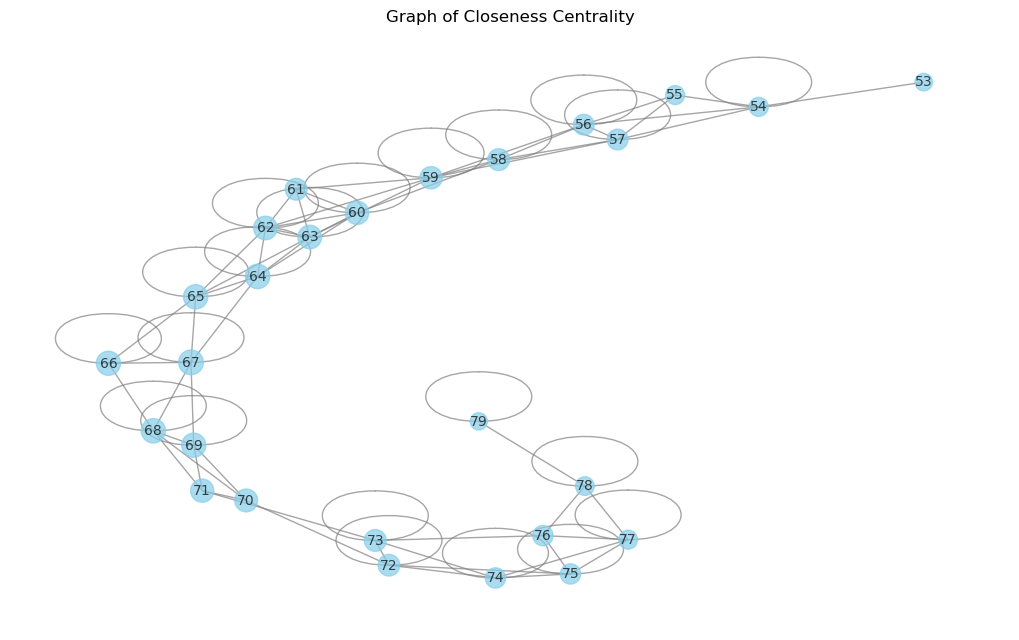

In [17]:
# Load the dataset
data = fb # Replace 'your_dataset.csv' with the path to your dataset
data=data.head(200)
# Create a graph from the dataset
G = nx.from_pandas_edgelist(data, source='Open', target='Close')

# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Plot closeness centrality
plt.figure(figsize=(10, 6))
nx.draw(G, 
        pos=nx.spring_layout(G),  # Position nodes using spring layout
        node_color='skyblue', 
        node_size=[v * 1000 for v in closeness_centrality.values()],  # Node size proportional to closeness centrality
        with_labels=True, 
        font_size=10,
        edge_color='gray',
        alpha=0.7)
plt.title('Graph of Closeness Centrality')
plt.show()


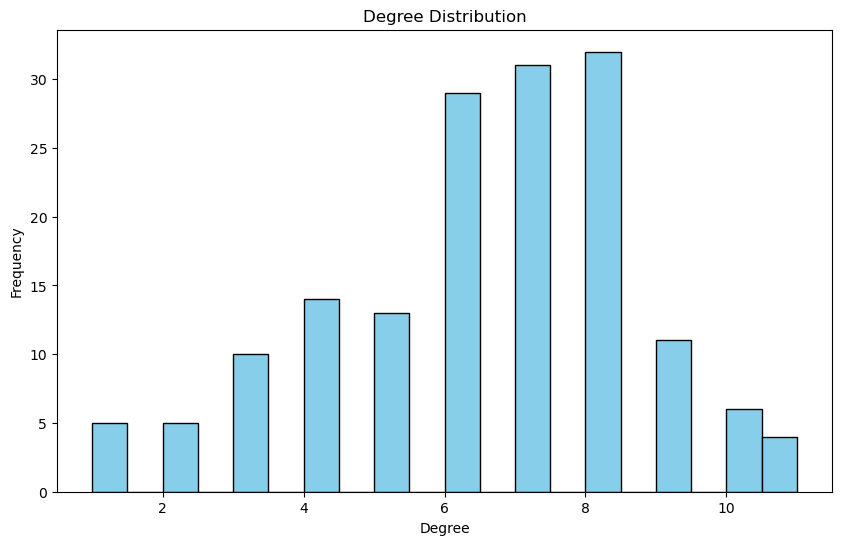

In [114]:
# Load the dataset
data = fb  # Replace 'your_dataset.csv' with the path to your dataset

# Create a graph from the dataset
G = nx.from_pandas_edgelist(data, source='Open', target='Close')

# Calculate degree distribution
degree_sequence = [d for n, d in G.degree()]

# Plot degree distribution
plt.figure(figsize=(10, 6))
plt.hist(degree_sequence, bins=20, color='skyblue', edgecolor='black')
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()


In [193]:
import networkx as nx
import pandas as pd

# Read the dataset
df = fb

# Filter out self-referential edges
filtered_edges = [(row['Open'], row['Close']) for _, row in df.iterrows() if row['Open'] != row['Close']]

# Create the graph
G = nx.Graph()
G.add_edges_from(filtered_edges)

# Visualization or further analysis with the graph


In [194]:
fb

,Date,Open,High,Low,Close,Adj Close,Volume,Profit
0,2013-12-31,54,54,53,54,54,43076200,0
1,2014-01-02,54,55,54,54,54,43195500,0
2,2014-01-03,55,55,54,54,54,38246200,-1
3,2014-01-06,54,57,54,57,57,68852600,3
4,2014-01-07,57,58,57,57,57,77207400,0
...,...,...,...,...,...,...,...,...
1254,2018-12-24,123,129,123,124,124,22066000,1
1255,2018-12-26,126,134,125,134,134,39723400,8
1256,2018-12-27,132,134,129,134,134,31202500,2
1257,2018-12-28,135,135,132,133,133,22627600,-2


Network Graph

In [195]:
import pandas as pd
from pyvis.network import Network

# Load the dataset
df = fb

# Create a Pyvis Network instance
got_net = Network(notebook=True, height="750px", width="100%", bgcolor="white", font_color="black")

# Use the Barnes-Hut algorithm for improved layout
got_net.barnes_hut()

# Extract sources and targets from the dataset
sources = df["Open"]
targets = df["Close"]

# Add nodes and edges to the Pyvis Network
edge_data = zip(sources, targets)
for e in edge_data:
    src = str(e[0])
    dst = str(e[1])
    got_net.add_node(src, src, title=src, color="blue")
    got_net.add_node(dst, dst, title=dst, color="red")
    got_net.add_edge(src, dst, color="black")

# Get the adjacency list
neighbor_map = got_net.get_adj_list()

# Update node properties with neighbor information
for node in got_net.nodes:
    node_id = node["id"]
    if node_id in neighbor_map:
        neighbors = neighbor_map[node_id]
        node["title"] += "<br>Neighbors:<br>" + "<br>".join(neighbors)
        node["value"] = len(neighbors)
    else:
        node["title"] += "<br>No neighbors"
        node["value"] = 0

# Visualize the network graph and save it to an HTML file
got_net.show("outputfile.html")


outputfile.html


In [196]:
G = nx.from_pandas_edgelist(df, 'Open', 'Close')

Betweenness Centrality

In [197]:
betweenness_centrality = nx.betweenness_centrality(G)

In [198]:
import pandas as pd

# create a list of dictionaries from the betweenness centrality output
centrality_dict = {'Node': [], 'Betweenness centrality': []}
for node, centrality in betweenness_centrality.items():
    centrality_dict['Node'].append(node)
    centrality_dict['Betweenness centrality'].append(centrality)

# create a pandas DataFrame from the list of dictionaries
BC = pd.DataFrame.from_dict(centrality_dict)
BC


,Node,Betweenness centrality
0,54,0.012181
1,55,0.000000
2,57,0.017913
3,58,0.009922
4,56,0.017913
...,...,...
155,208,0.000000
156,210,0.000000
157,215,0.000080
158,214,0.000000


In [199]:
import plotly.graph_objects as go
ji=BC.sort_values(by='Betweenness centrality',ascending=False)
BC_S=ji.head(10)
bet=pd.DataFrame(BC_S)

BCi = go.Figure(data=[go.Bar(x=bet['Node'], y=bet['Betweenness centrality'])])
BCi.update_layout(title='Betweenness centrality', xaxis_title='Open', yaxis_title='Close')

C:\Users\akash\AppData\Local\Temp\ipykernel_21876\2671684553.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



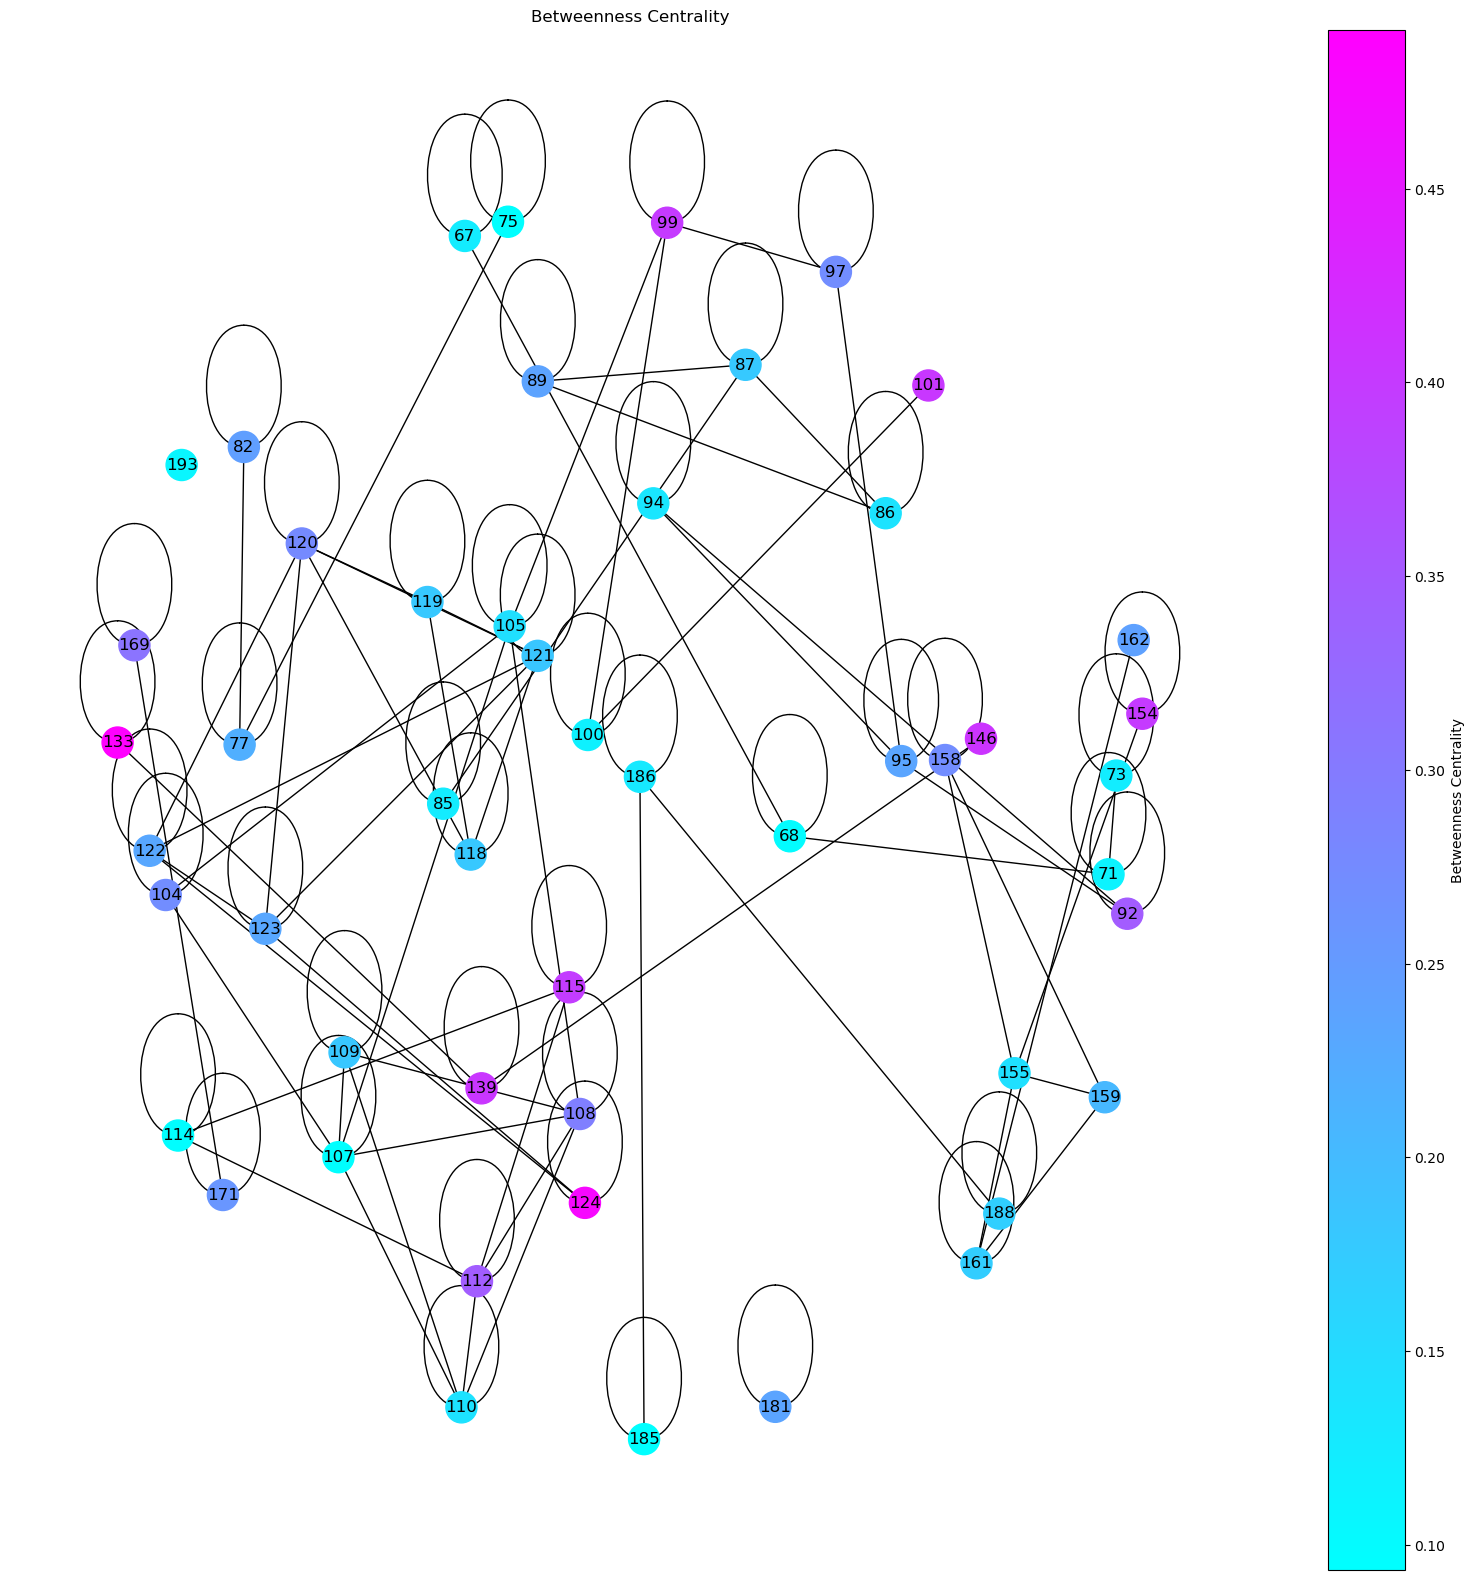

In [200]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Read the dataset
df = fb

# Assuming BC is your DataFrame containing betweenness centrality values
# Replace 'BC' with your actual DataFrame containing betweenness centrality values
BC_df = BC.sort_values(by='Betweenness centrality', ascending=False).head(20)
df_filter = BC_df.head(5)
name_list = df_filter["Node"].tolist()
df_bc = df[df["Open"].isin(name_list)]  # Assuming 'Open' column contains node identifiers
df_filter.rename(columns={'Node': 'Open'}, inplace=True)
df_merged = pd.merge(df_bc, df_filter, on='Open', how='left')

# Create a graph from the dataset
G = nx.Graph()

# Add nodes from the 'Open' column
G.add_nodes_from(df['Open'])  # Assuming 'Open' column contains node identifiers

# Add edges between nodes
edges = [(row['Open'], row['High']) for _, row in df.iterrows()]  # Assuming 'High' column is connected to 'Open'
G.add_edges_from(edges)

# Get top nodes based on betweenness centrality
top_nodes = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:50]  
G_sub = G.subgraph(top_nodes)

# Calculate layout for the subgraph (using spring_layout with k set to 1)
pos = nx.spring_layout(G_sub, k=1)

# Create a list of colors based on betweenness centrality values for the subgraph
node_colors = [betweenness_centrality[node] for node in G_sub.nodes()]

# Draw the subgraph with node colors based on betweenness centrality
plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(G_sub, pos, node_color=node_colors, cmap='cool', node_size=500)

# Draw the edges
nx.draw_networkx_edges(G_sub, pos)

# Add labels to the nodes
nx.draw_networkx_labels(G_sub, pos)

# Add a color bar for the node colors
sm = plt.cm.ScalarMappable(cmap='cool', norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])
plt.colorbar(sm, label='Betweenness Centrality', ax=plt.gca())  # Specify the axes for the colorbar

# Display the plot
plt.title("Betweenness Centrality")
plt.axis('off')
plt.show()


In [201]:
import networkx as nx

# Create an empty graph
G1 = nx.Graph()

# Add nodes from the 'Open' column
G1.add_nodes_from(df_bc['Open'])  # Assuming 'Open' column contains node identifiers

# Add edges between nodes
edges = [(row['Open'], row['High']) for _, row in df_bc.iterrows()]  # Assuming 'High' column is connected to 'Open'
G1.add_edges_from(edges)


Degree Centrality

In [202]:
deg_centrality = nx.degree_centrality(G)

In [203]:
deg_dict = {'Node': [], 'deg_centrality': []}
for node, centrality in deg_centrality.items():
    deg_dict['Node'].append(node)
    deg_dict['deg_centrality'].append(centrality)

DC = pd.DataFrame.from_dict(deg_dict)
DC

,Node,deg_centrality
0,54,0.025157
1,55,0.025157
2,57,0.044025
3,58,0.044025
4,56,0.025157
...,...,...
155,162,0.018868
156,205,0.006289
157,211,0.012579
158,216,0.006289


In [204]:
ji=DC.sort_values(by='deg_centrality',ascending=False)
sui=ji.head(20)
suii=pd.DataFrame(sui)
DCi = go.Figure(data=[go.Bar(x=suii['Node'], y=suii['deg_centrality'])])
DCi.update_layout(title='Degree_Centrality', xaxis_title='Open', yaxis_title='Close')

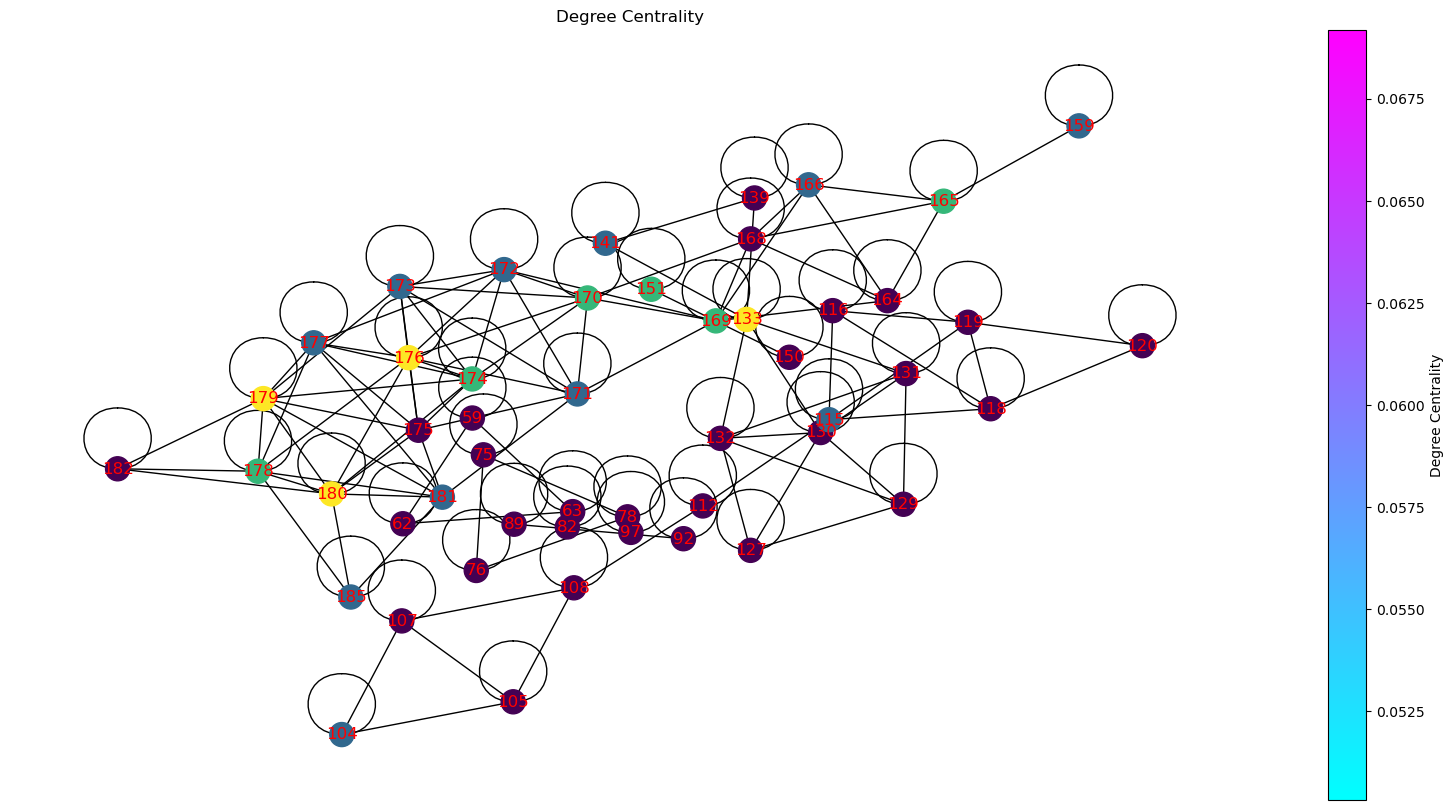

In [205]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the graph
G = nx.from_pandas_edgelist(df, 'Open', 'Close')

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Sort nodes by degree centrality and select the top nodes
top_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:50]  # Adjust the number of nodes here

# Create a subgraph containing only the top nodes and their edges
G_sub = G.subgraph(top_nodes)

# Calculate layout for the subgraph (using kamada_kawai_layout for better spacing)
pos = nx.kamada_kawai_layout(G_sub)

# Create a list of colors based on degree centrality values for the subgraph
node_colors = [degree_centrality[node] for node in G_sub.nodes]

plt.figure(figsize=(20,10))
nx.draw_networkx(G_sub, pos, node_color=node_colors, with_labels=False)
nx.draw_networkx_labels(G_sub, pos, font_color='red')

sm = plt.cm.ScalarMappable(cmap='cool', norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])
plt.colorbar(sm, label='Degree Centrality', ax=plt.gca())

plt.title("Degree Centrality")
plt.axis('off') 
plt.show()


Closeness Centrality

In [206]:
closeness_centrality = nx.closeness_centrality(G)

In [207]:
clo_dict = {'Node': [], 'closeness_centrality': []}
for node, centrality in closeness_centrality.items():
    clo_dict['Node'].append(node)
    clo_dict['closeness_centrality'].append(centrality)

iop=pd.DataFrame.from_dict(clo_dict)
vii=iop.sort_values(by='closeness_centrality',ascending=False)
vii

,Node,closeness_centrality
80,133,0.086921
73,124,0.086719
86,139,0.086019
69,122,0.086019
70,123,0.086019
...,...,...
157,215,0.012579
158,214,0.008386
159,217,0.008386
153,207,0.000000


In [208]:
vii=vii.head(20)
vi=pd.DataFrame(vii)
clc = go.Figure(data=[go.Bar(x=vi['Node'], y=vi['closeness_centrality'])])
clc.update_layout(title='closeness_centrality', xaxis_title='Open', yaxis_title='Close')


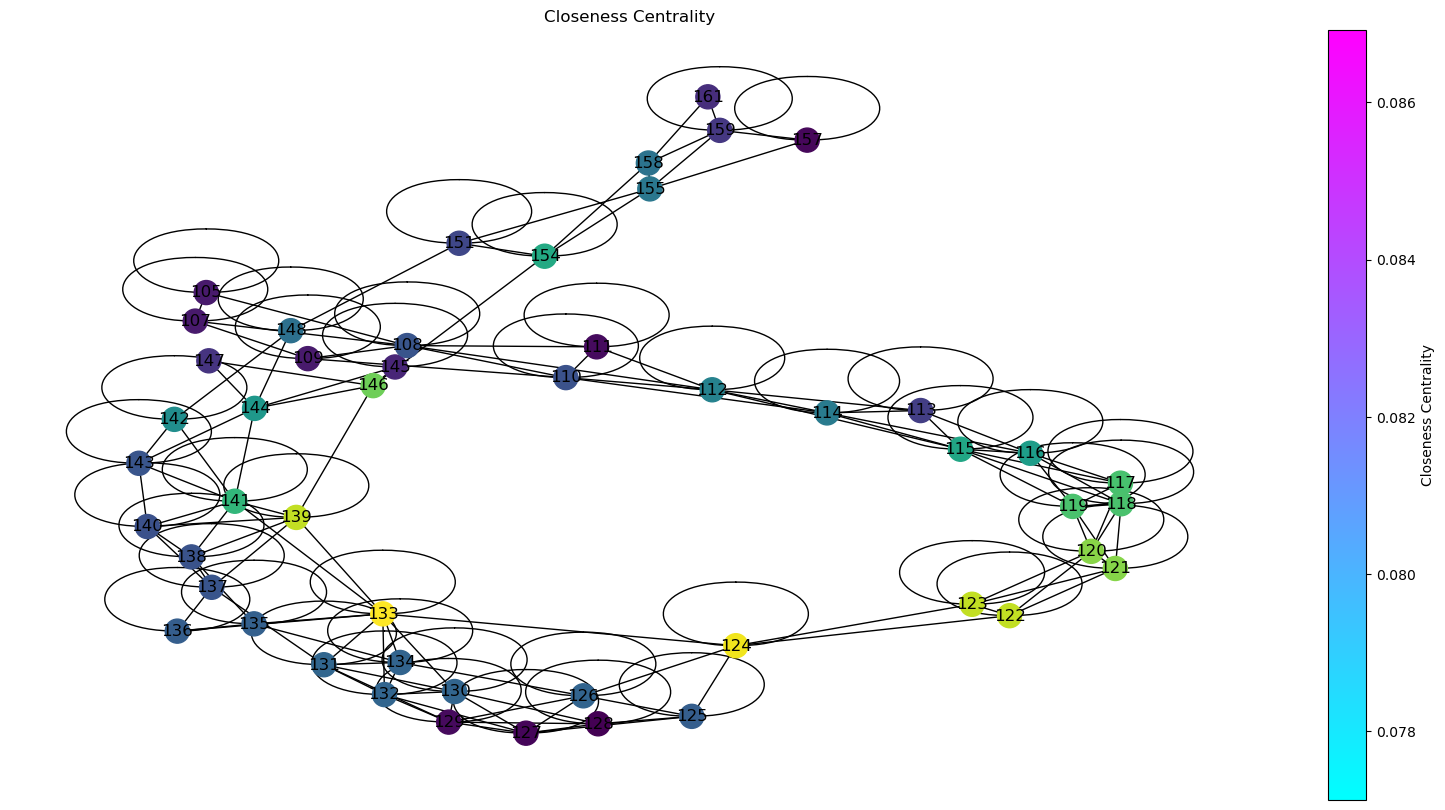

In [209]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Read the dataset
df = fb

# Create the graph
G = nx.from_pandas_edgelist(df, 'Open', 'Close')

# Calculate closeness centrality
close_centrality = nx.closeness_centrality(G)

# Sort nodes based on closeness centrality and select top nodes
top_nodes = sorted(close_centrality, key=close_centrality.get, reverse=True)[:50]  # Adjust the number of nodes here

# Subgraph containing only the top nodes and their edges
G_sub = G.subgraph(top_nodes)

# Calculate layout for the subgraph
pos = nx.spring_layout(G_sub, seed=42)

# Create a list of colors based on closeness centrality values for the subgraph
node_colors = [close_centrality[node] for node in G_sub.nodes]

# Draw the subgraph with node colors based on closeness centrality
plt.figure(figsize=(20, 10))
nx.draw_networkx(G_sub, pos, node_color=node_colors, with_labels=False)
nx.draw_networkx_labels(G_sub, pos)

# Create a colorbar to show the closeness centrality values
sm = plt.cm.ScalarMappable(cmap='cool', norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])
plt.colorbar(sm, label='Closeness Centrality', ax=plt.gca())

# Set the title of the plot
plt.title("Closeness Centrality")
plt.axis('off')  # Turn off axis
plt.show()


Eigen Centrality

In [210]:
eigen_centrality = nx.eigenvector_centrality(G)

In [211]:
eig_dict = {'Node': [], 'eigen_centrality': []}
for node, centrality in eigen_centrality.items():
    eig_dict['Node'].append(node)
    eig_dict['eigen_centrality'].append(centrality)
fi=pd.DataFrame.from_dict(eig_dict)
fi

,Node,eigen_centrality
0,54,4.191617e-08
1,55,3.478726e-08
2,57,8.131319e-08
3,58,9.259388e-08
4,56,8.131319e-08
...,...,...
155,208,1.081368e-08
156,210,7.403483e-33
157,215,6.211968e-29
158,214,4.392524e-29


In [212]:
fii=fi.sort_values(by='eigen_centrality',ascending=False)
fiii=fii.head(10)
fiv=pd.DataFrame(fiii)
eig = go.Figure(data=[go.Bar(x=fiv['Node'], y=fii['eigen_centrality'])])
eig.update_layout(title='eigen_centrality', xaxis_title='Open', yaxis_title='Close')


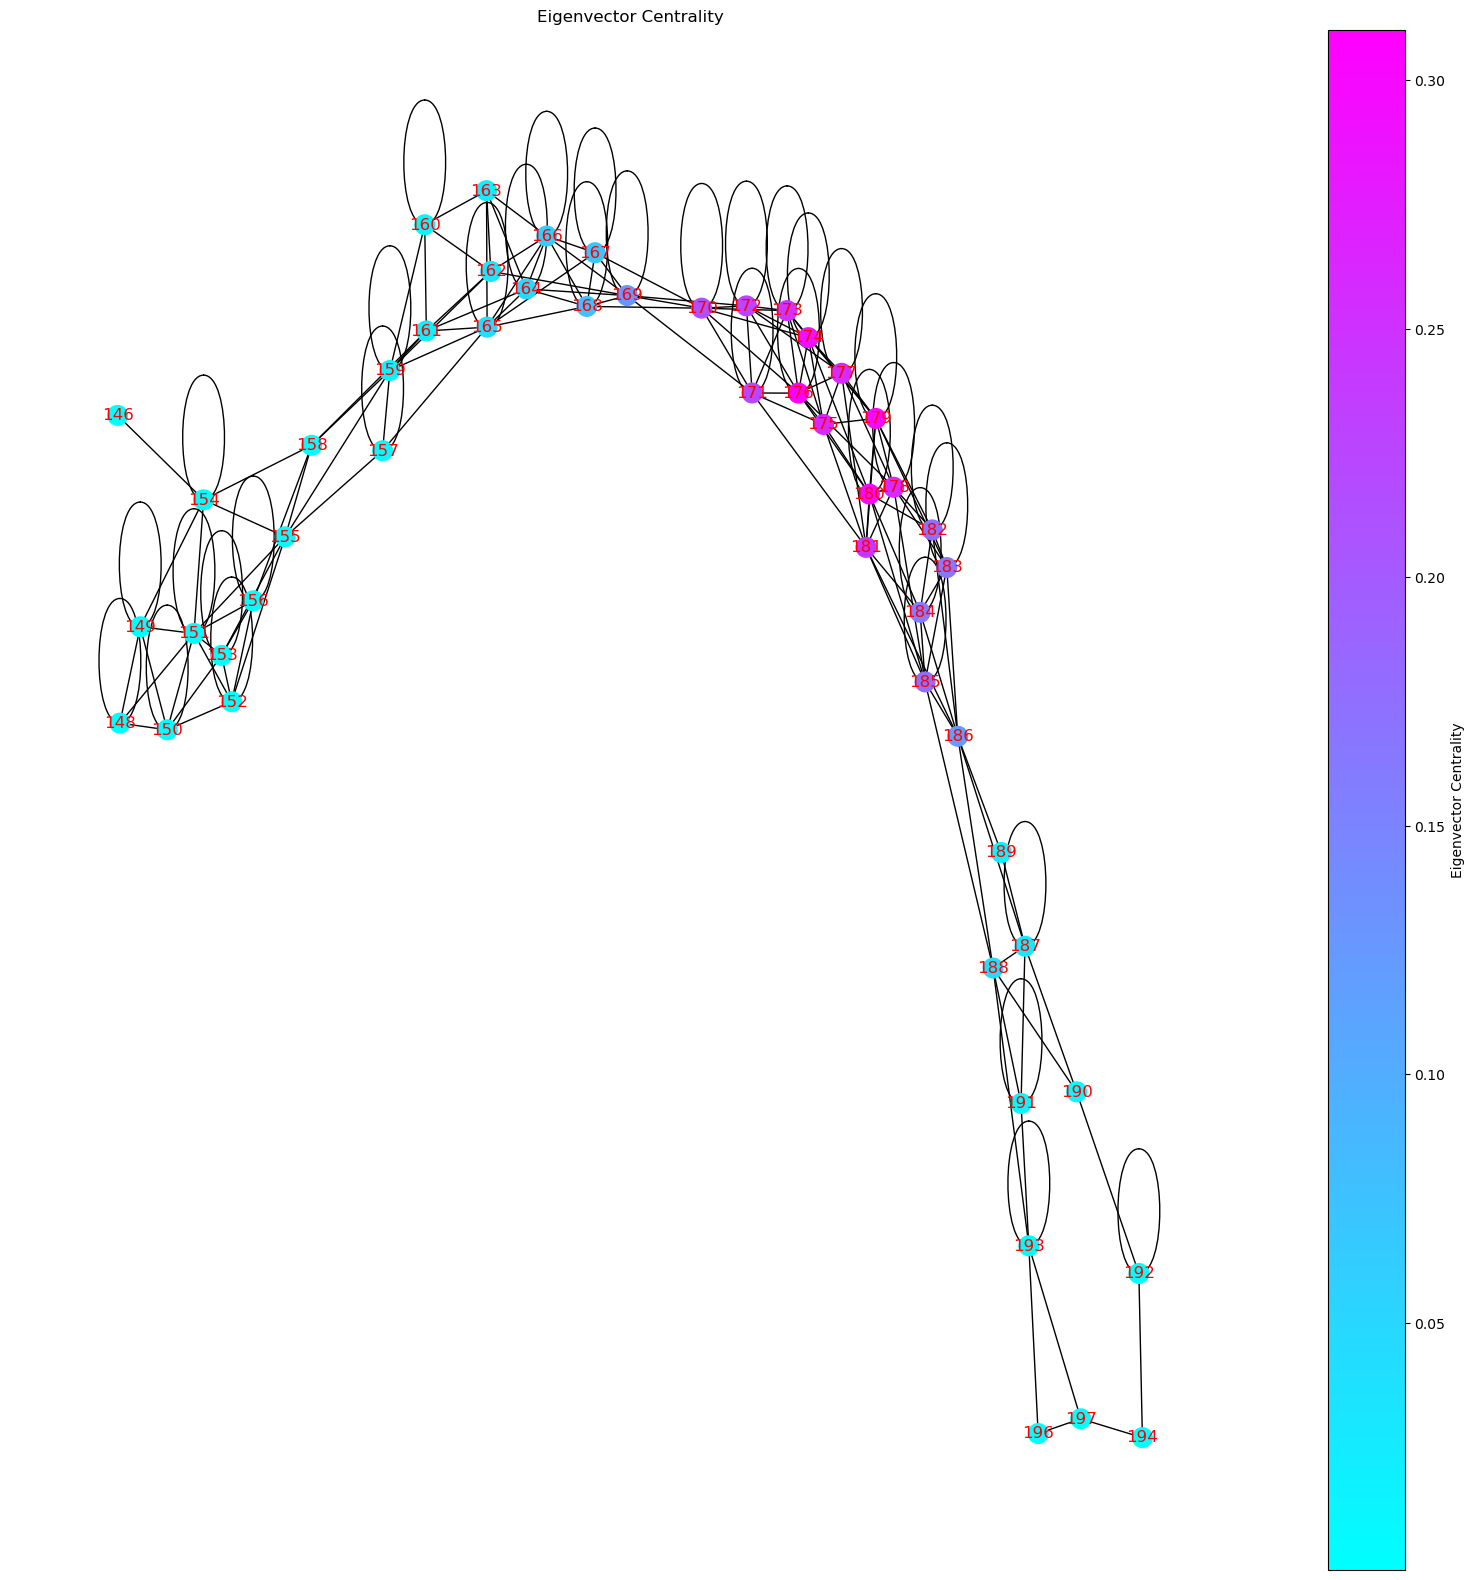

In [213]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Read the dataset
df = fb

# Create the graph
G = nx.from_pandas_edgelist(df, 'Open', 'Close')

# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# Sort nodes based on eigenvector centrality and select top nodes
top_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)[:50]  # Adjust the number of nodes here

# Subgraph containing only the top nodes and their edges
G_sub = G.subgraph(top_nodes)

# Calculate layout for the subgraph
pos = nx.spring_layout(G_sub, seed=42)

# Create a list of colors based on eigenvector centrality values for the subgraph
node_colors = [eigenvector_centrality[node] for node in G_sub.nodes]

# Draw the subgraph with node colors based on eigenvector centrality
plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(G_sub, pos, node_color=node_colors, cmap='cool', node_size=200)

# Draw the edges
nx.draw_networkx_edges(G_sub, pos)
nx.draw_networkx_labels(G_sub, pos, font_color='red')

# Add a color bar for the node colors
sm = plt.cm.ScalarMappable(cmap='cool', norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])
plt.colorbar(sm, label='Eigenvector Centrality', ax=plt.gca())  # Specify the axes for the colorbar

# Display the plot
plt.title("Eigenvector Centrality")
plt.axis('off')
plt.show()


# harmonic_centrality

In [214]:
harmonic_centrality = nx.harmonic_centrality(G)
eig_dict = {'Node': [], 'harmonic_centrality': []}
for node, centrality in harmonic_centrality.items():
    eig_dict['Node'].append(node)
    eig_dict['harmonic_centrality'].append(centrality)
fi=pd.DataFrame.from_dict(eig_dict)
fi

,Node,harmonic_centrality
0,53,10.896551
1,54,13.612671
2,55,13.112671
3,56,15.506666
4,57,15.506666
...,...,...
155,209,12.564596
156,210,0.000000
157,214,1.500000
158,215,2.000000


In [215]:
fii=fi.sort_values(by='harmonic_centrality',ascending=False)
fiii=fii.head(10)
fiv=pd.DataFrame(fiii)
eig = go.Figure(data=[go.Bar(x=fiv['Node'], y=fii['harmonic_centrality'])])
eig.update_layout(title='harmonic_centrality', xaxis_title='Open', yaxis_title='Close')


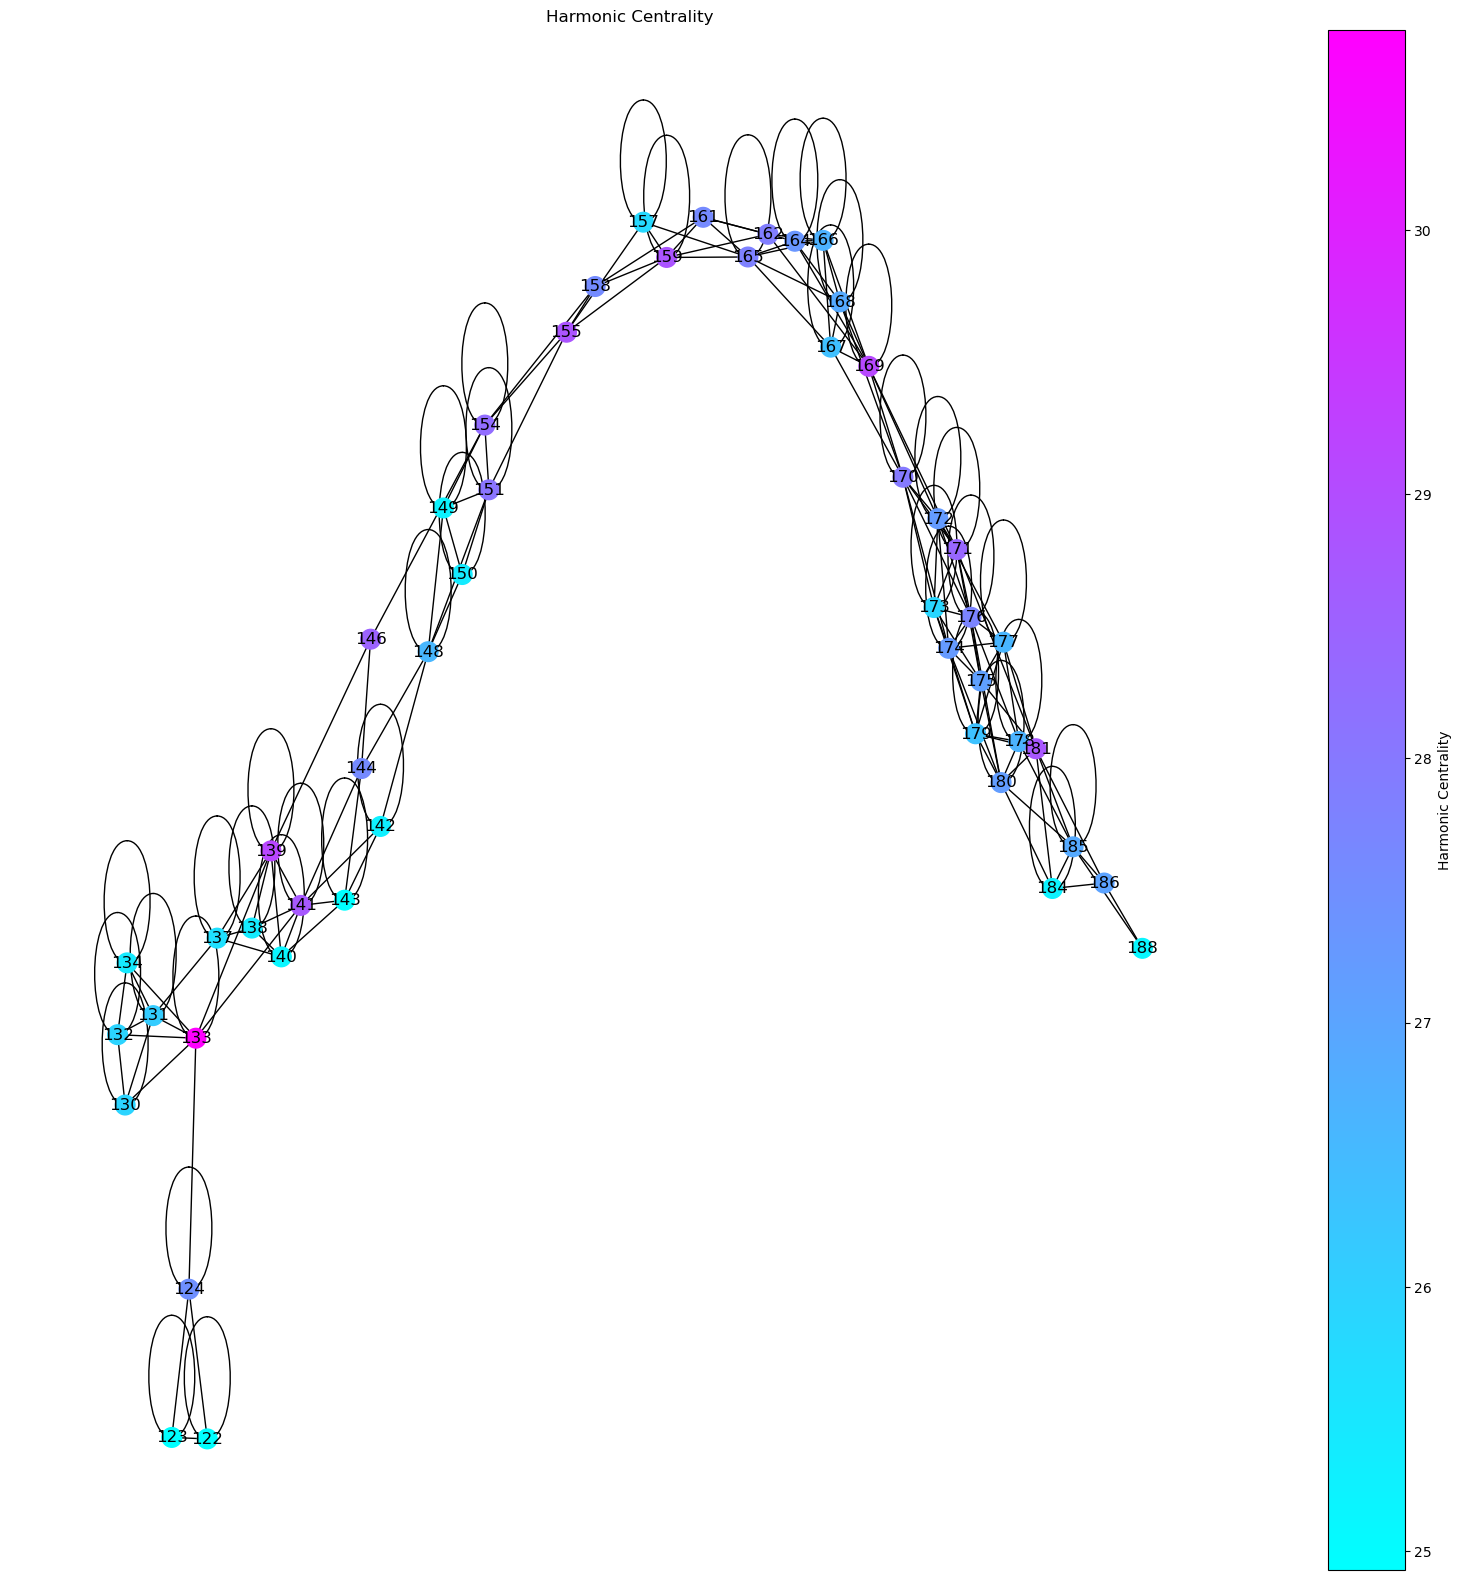

In [216]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Read the dataset
df = fb

# Create a graph from the dataset
G = nx.from_pandas_edgelist(df, 'Open', 'Close')

# Calculate harmonic centrality
harmonic_centrality = nx.harmonic_centrality(G)

# Sort nodes by harmonic centrality and select the top nodes
top_nodes = sorted(harmonic_centrality, key=harmonic_centrality.get, reverse=True)[:50]

# Create a subgraph containing only the top nodes and their edges
G_sub = G.subgraph(top_nodes)

# Calculate layout for the subgraph
pos = nx.spring_layout(G_sub, seed=42)

# Create a list of colors based on harmonic centrality values for the subgraph
node_colors = [harmonic_centrality[node] for node in G_sub.nodes]

# Draw the subgraph with node colors based on harmonic centrality
plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(G_sub, pos, node_color=node_colors, cmap='cool', node_size=200)
nx.draw_networkx_edges(G_sub, pos)
nx.draw_networkx_labels(G_sub, pos)
sm = plt.cm.ScalarMappable(cmap='cool', norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])
plt.colorbar(sm, label='Harmonic Centrality', ax=plt.gca())  # Specify the axes for the colorbar

plt.title("Harmonic Centrality")
plt.axis('off')
plt.show()


In [217]:
fb

,Date,Open,High,Low,Close,Adj Close,Volume,Profit
0,2013-12-31,54,54,53,54,54,43076200,0
1,2014-01-02,54,55,54,54,54,43195500,0
2,2014-01-03,55,55,54,54,54,38246200,-1
3,2014-01-06,54,57,54,57,57,68852600,3
4,2014-01-07,57,58,57,57,57,77207400,0
...,...,...,...,...,...,...,...,...
1254,2018-12-24,123,129,123,124,124,22066000,1
1255,2018-12-26,126,134,125,134,134,39723400,8
1256,2018-12-27,132,134,129,134,134,31202500,2
1257,2018-12-28,135,135,132,133,133,22627600,-2


Cliques

In [218]:
G = nx.from_pandas_edgelist(df, 'Open', 'Close')
cliques = list(nx.find_cliques(G))
print(len(cliques))

167


ML Model Random Forest Regressor

In [221]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

data= fb
df = pd.DataFrame(data)

# Split the data into features (X) and target variable (y)
X = df.drop(['Date', 'Profit'], axis=1)
y = df['Profit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.0255742063492064


In [21]:
dataa=fb
dataa

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-31,54,54,53,54,54,43076200
1,2014-01-02,54,55,54,54,54,43195500
2,2014-01-03,55,55,54,54,54,38246200
3,2014-01-06,54,57,54,57,57,68852600
4,2014-01-07,57,58,57,57,57,77207400
...,...,...,...,...,...,...,...
1254,2018-12-24,123,129,123,124,124,22066000
1255,2018-12-26,126,134,125,134,134,39723400
1256,2018-12-27,132,134,129,134,134,31202500
1257,2018-12-28,135,135,132,133,133,22627600


In [ ]:
#for i in range(1259):
    #if data